## Import libraries and load data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/amazon_reviews_data_clean.csv')

In [ ]:
df.head()

,review_id,product_id,product_name,brand,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,date,review length
0,r2lvx0omhfzx0l,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars sounds great,hollywoody,5,i just sent back my jbl flip because it had di...,"reviewed in the united states january 9, 2025",ahcsv6wlxxa2exlwomlmb2fzbkeq,False,0,{},1/9/2025,23
1,r1vf3bhpt5c61n,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars jbl,michael,5,they are a great value. the sound is awesome. ...,"reviewed in the united states january 8, 2025",ahuwzoal676robbd7srer6kyjbka,False,0,{},1/8/2025,11
2,r2yfcrsc298ts7,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars i love it!,william g.,5,"the sound quality is amazing, it’s easy to pai...","reviewed in the united states january 8, 2025",agy6hyebnuxqxea7gpozyzrry3fq,False,0,{},1/8/2025,14
3,r1dkvihxe9rzus,b0d4sx9rc6,beats pill,beats by dre,2.0 out of 5 stars must me rejects from a real...,lady b,2,this speaker must have come from failed qualit...,"reviewed in the united states january 8, 2025",ah3zdvkgdobn2oi6ch5wlvmn3jma,False,0,{},1/8/2025,66
4,rlruivaagz3en,b0d4sx9rc6,beats pill,beats by dre,5.0 out of 5 stars a gift for my dad,jacky k.,5,sound quality is good. it can get pretty loud ...,"reviewed in the united states january 8, 2025",afyjoku2nxnz5qcvtjcrgjbfuiva,False,0,{},1/8/2025,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           700 non-null    object
 1   product_id          700 non-null    object
 2   product_name        700 non-null    object
 3   brand               700 non-null    object
 4   title               700 non-null    object
 5   author              700 non-null    object
 6   rating              700 non-null    int64 
 7   content             700 non-null    object
 8   timestamp           700 non-null    object
 9   profile_id          700 non-null    object
 10  is_verified         700 non-null    bool  
 11  helpful_count       700 non-null    int64 
 12  product_attributes  700 non-null    object
 13  date                700 non-null    object
 14  review length       700 non-null    int64 
dtypes: bool(1), int64(3), object(11)
memory usage: 77.4+ KB


## Visualizing Most Common Words

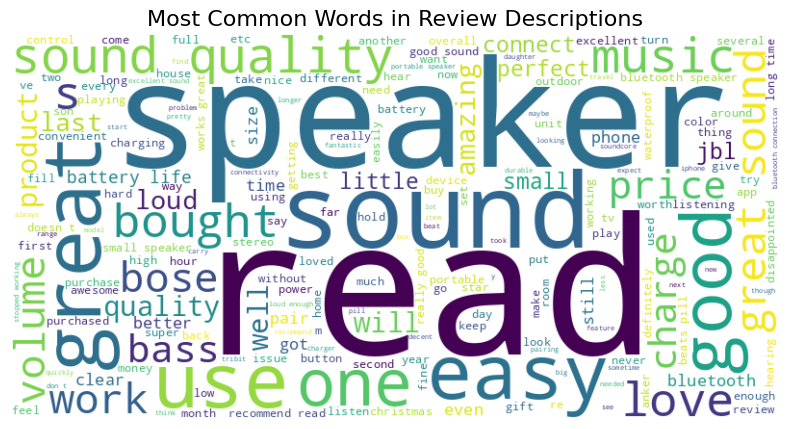

In [ ]:
# Combine all review descriptions into one string
text = " ".join(review for review in df['content'].dropna())

# Generate a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Review Descriptions", fontsize=16)
plt.show()

## Weighted Wordclouds

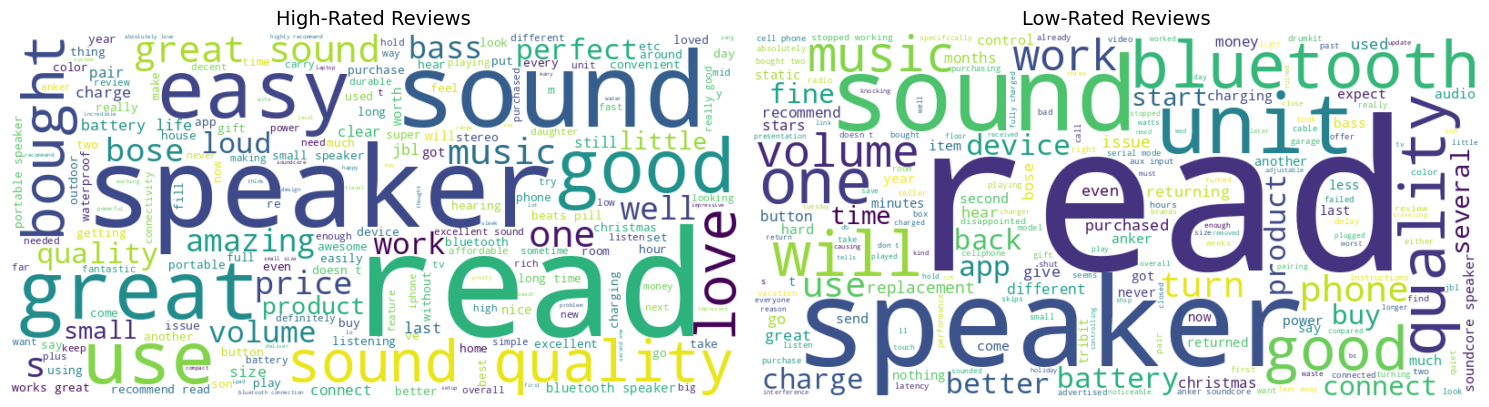

In [ ]:
# Separate high-rated and low-rated reviews
high_rated = " ".join(review for review in df[df['rating'] >= 4]['content'].dropna())
low_rated = " ".join(review for review in df[df['rating'] <= 2]['content'].dropna())

# Generate high-rated wordcloud
high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_rated)

# Generate low-rated wordcloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rated)

# Display the wordclouds side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(high_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("High-Rated Reviews", fontsize=14)

axs[1].imshow(low_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Low-Rated Reviews", fontsize=14)

plt.tight_layout()
plt.show()

## Frequency Charts

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-7-4cb3f8c78f63>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


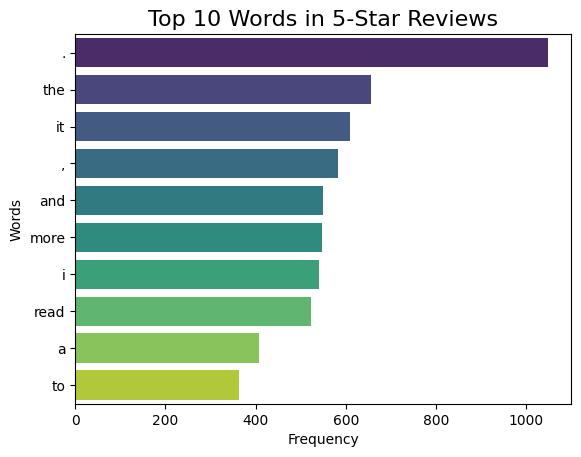

In [ ]:
# Most frequent words

from collections import Counter
import nltk
nltk.download('punkt_tab')

# Tokenize the review descriptions for 5-star reviews
from nltk.tokenize import word_tokenize

five_star_reviews = " ".join(review for review in df[df['rating'] == 5]['content'].dropna())
tokens = word_tokenize(five_star_reviews.lower())

# Count word frequencies
common_words = Counter(tokens).most_common(10)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

## Comparative Word Frequencies

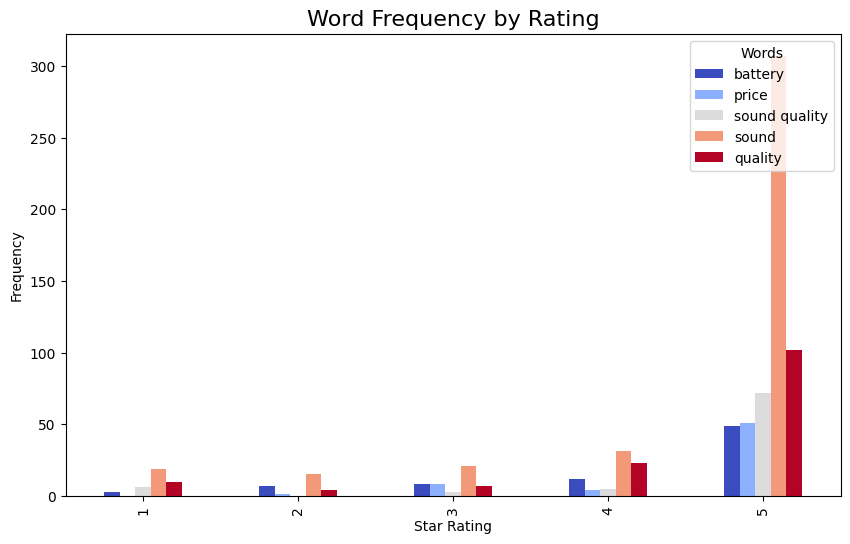

In [ ]:
# Define words to compare
words_to_compare = ['battery', 'price', 'sound quality', 'sound', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: df[df['content'].str.contains(word, case=False, na=False)]['rating'].value_counts() for word in words_to_compare}

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

# Plot as a bar chart
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()

## Comparative Visualizations

### Compare the Average Star Rating Across Brands

<ipython-input-9-1dde18cdb153>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')


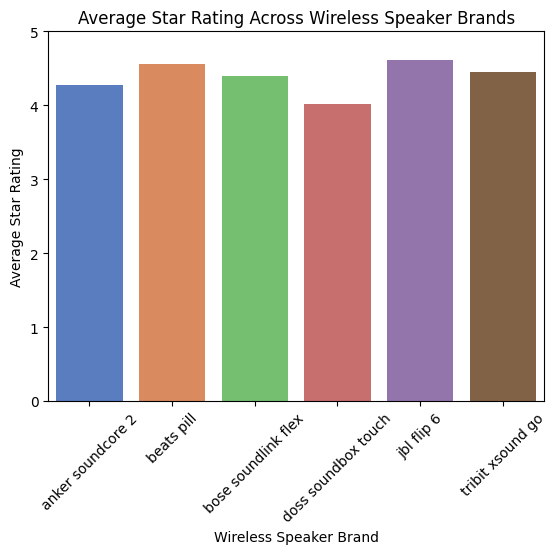

In [ ]:
# Calculate average star rating for each product
avg_rating = df.groupby('product_name')['rating'].mean().reset_index()

# Plot the average ratings
sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Wireless Speaker Brands")
plt.xlabel("Wireless Speaker Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

## Proportion of Positive, Neutral and Negatie Reviews

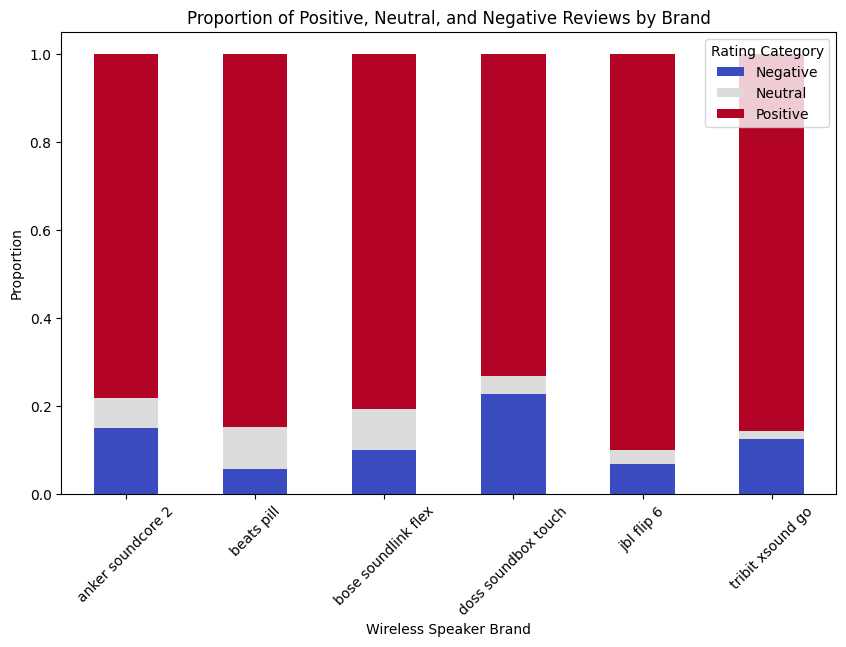

In [ ]:
# Define rating categories
def categorize_rating(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Add a new column for rating categories
df['Rating Category'] = df['rating'].apply(categorize_rating)

# Calculate proportions by brand, since there's only one type of product per brand
rating_proportions = df.groupby(['product_name', 'Rating Category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

# Plot the proportions
rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Wireless Speaker Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=45)
plt.show()

## Box Plots: Variability in Ratings Across Brands

<ipython-input-11-6d0d3a9c05b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')


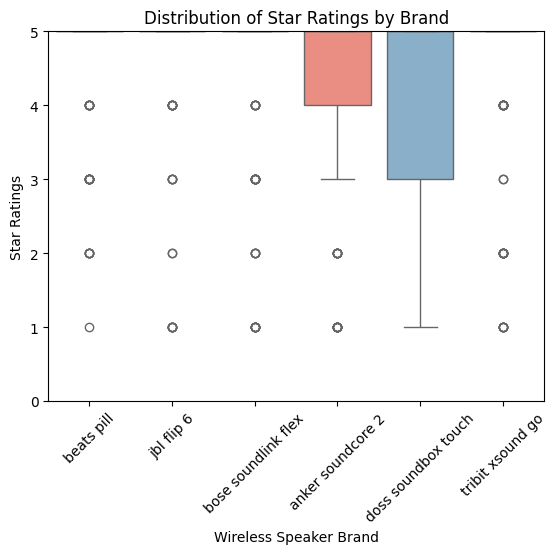

In [ ]:
# Box plot of star ratings by brand
sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Wireless Speaker Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

## Stacked Bar Charts: Rating Distribution for Each Brand

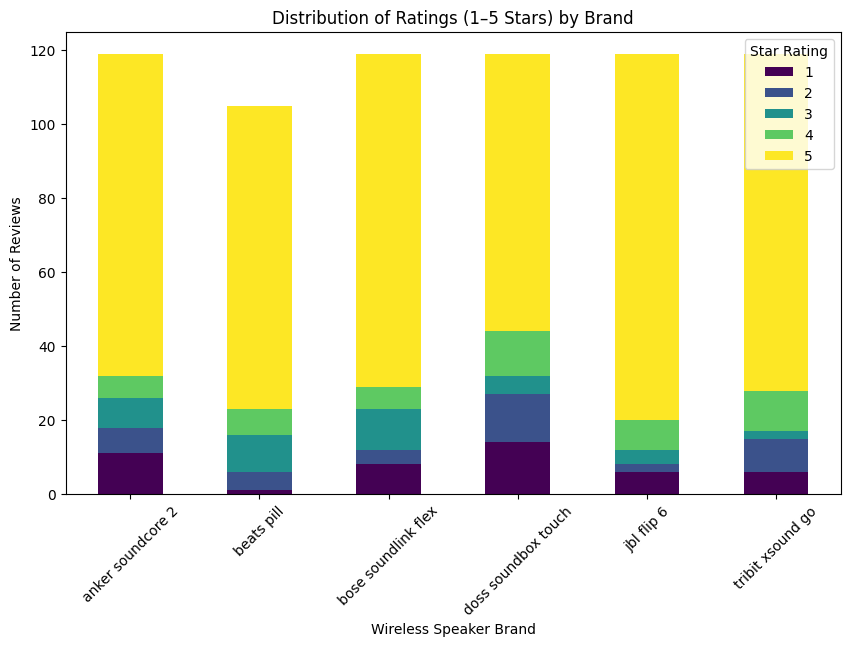

In [ ]:
# Count the number of each star rating per product
rating_counts = df.groupby(['product_name', 'rating']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Wireless Speaker Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", loc="upper right")
plt.show()

## Line Chart: Average Star Rating Over Time

In [ ]:
# Preprocessing to extract the Year

# Convert Date to datetime and extract year
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

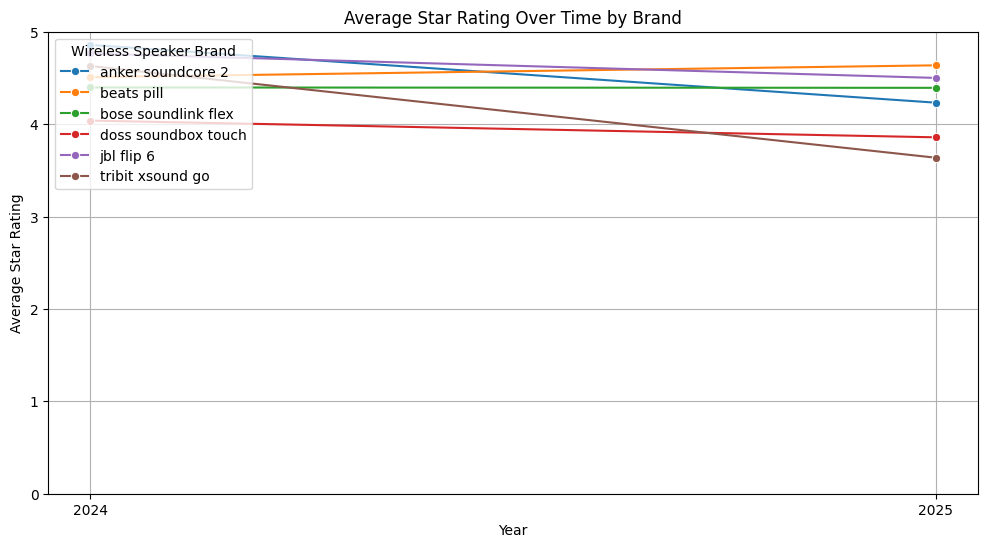

In [ ]:
# Calculate yearly average star rating for each product
yearly_avg = df.groupby(['year', 'product_name'])['rating'].mean().reset_index()

# Plot the timeline
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='year', y='rating', hue='product_name', marker='o', palette='tab10')
plt.title("Average Star Rating Over Time by Brand")
plt.xlabel("Year")
plt.ylabel("Average Star Rating")
plt.xticks(yearly_avg['year'].dropna().unique())
plt.ylim(0, 5)
plt.legend(title="Wireless Speaker Brand", loc="upper left")
plt.grid(True)
plt.show()

# Customization and Styling

## Applying Seaborn Themes

In [ ]:
import seaborn as sns

# Set a Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel")

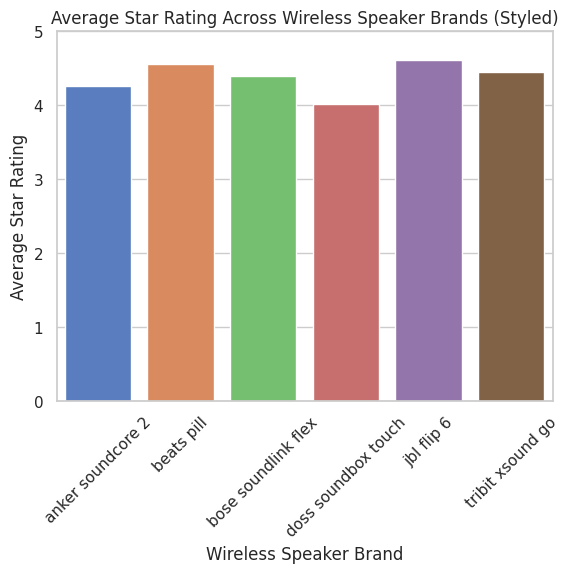

In [ ]:
# Replot a bar chart with the new theme
sns.barplot(x='product_name', y='rating', data=avg_rating, hue='product_name', palette="muted")
plt.title("Average Star Rating Across Wireless Speaker Brands (Styled)")
plt.xlabel("Wireless Speaker Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

## Using Matplotlib Styles

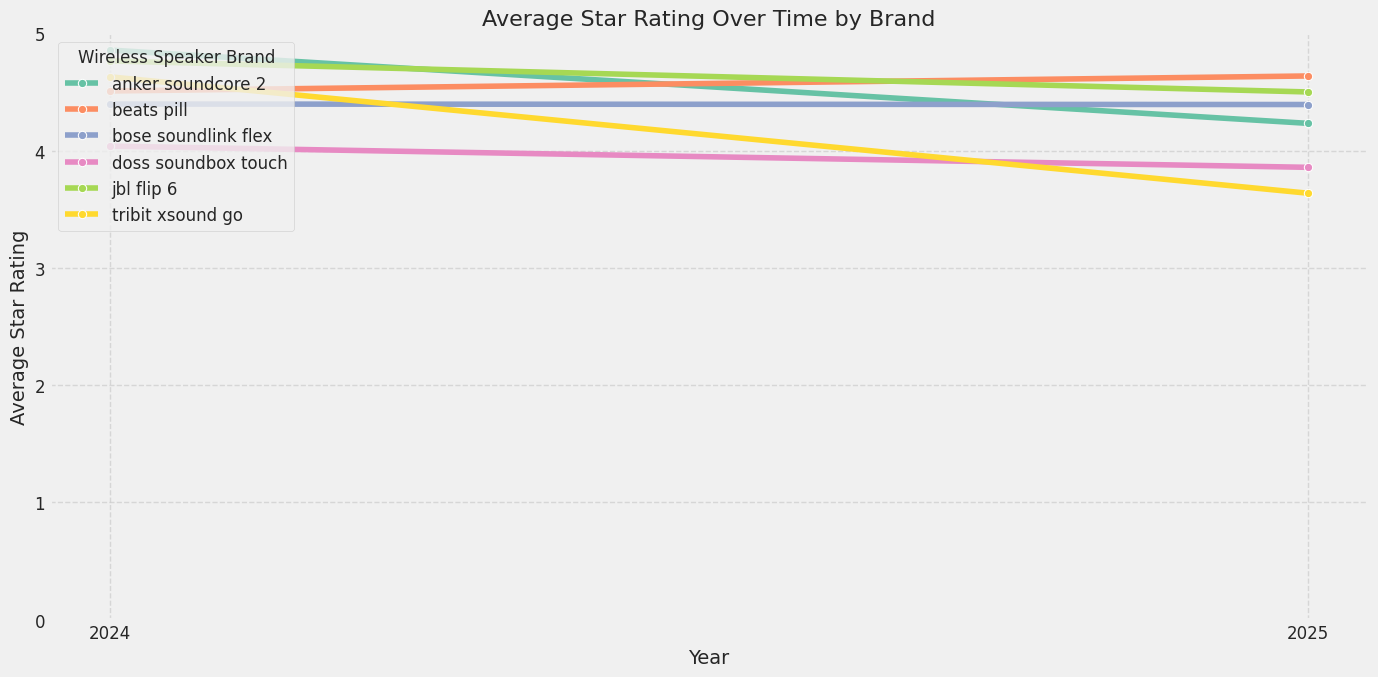

In [ ]:
# Apply a Matplotlib style
plt.style.use('fivethirtyeight')

# Replot a line chart with the new style
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_avg, x='year', y='rating', hue='product_name', marker='o', palette='Set2')
plt.title("Average Star Rating Over Time by Brand", fontsize=16)  # Increase title font size
plt.xlabel("Year", fontsize=14)  # Increase axis label font sizes
plt.ylabel("Average Star Rating", fontsize=14)
plt.xticks(yearly_avg['year'].dropna().unique(), fontsize=12)  # Increase tick label font size
plt.yticks(fontsize=12)
plt.ylim(0, 5)
plt.legend(title="Wireless Speaker Brand", loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Adjust grid appearance
plt.tight_layout()  # Ensure elements don't overlap
plt.show()